In [13]:
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from matplotlib import pyplot as plt
from skimage.color import rgb2gray

## b) Extract birds pictures

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
tr1 = unpickle('../Data/data_batch_1')
indices = [i for i, x in enumerate(tr1[b'labels']) if x == 2]
df1 = pd.DataFrame(tr1[b'data'][indices, :])

tr2 = unpickle('../Data/data_batch_2')
indices = [i for i, x in enumerate(tr2[b'labels']) if x == 2]
df2 = pd.DataFrame(tr2[b'data'][indices, :])

tr3 = unpickle('../Data/data_batch_3')
indices = [i for i, x in enumerate(tr3[b'labels']) if x == 2]
df3 = pd.DataFrame(tr3[b'data'][indices, :])

tr4 = unpickle('../Data/data_batch_4')
indices = [i for i, x in enumerate(tr4[b'labels']) if x == 2]
df4 = pd.DataFrame(tr4[b'data'][indices, :])

tr5 = unpickle('../Data/data_batch_5')
indices = [i for i, x in enumerate(tr5[b'labels']) if x == 2]
df5 = pd.DataFrame(tr5[b'data'][indices, :])

te = unpickle('../Data/test_batch')
indices = [i for i, x in enumerate(te[b'labels']) if x == 2]
test_set = pd.DataFrame(te[b'data'][indices, :])

frames = [df1, df2, df3, df4, df5, test_set]
df = pd.concat(frames)
df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,164,105,118,129,134,146,166,183,199,174,...,98,71,48,58,64,48,41,29,26,44
1,17,17,17,17,19,19,20,22,22,21,...,47,36,25,21,21,21,21,20,18,16
2,197,198,201,202,203,205,205,208,210,210,...,84,85,93,91,96,91,70,61,63,57
3,73,71,77,120,125,155,147,133,112,100,...,18,22,55,122,87,53,46,55,38,29
4,145,145,148,160,164,169,185,195,188,194,...,177,161,144,171,167,165,167,160,150,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,116,116,127,124,121,126,129,134,135,138,...,124,103,121,178,200,187,135,127,74,69
996,139,156,171,183,192,199,200,200,196,190,...,103,79,53,98,103,98,97,93,88,81
997,73,67,62,56,47,41,39,42,45,50,...,143,141,141,142,142,142,142,144,148,151
998,49,8,7,20,33,31,15,7,19,18,...,50,47,41,32,43,112,134,86,52,63


In [146]:
df1 = df.iloc[:, :1024].to_numpy()
df2 = df.iloc[:, 1024:2048].to_numpy()
df3 = df.iloc[:, 2048:].to_numpy()
final = np.stack((df1, df2, df3))
final.shape

(3, 6000, 1024)

## c) Subset at least 10% (not used)

In [7]:
## OPTIONAL
x = np.random.choice(1024, 103, replace=False)
x1 = np.sort(x, axis=None)
final1 = final[:, :, x1]
final1.shape
## OPTIONAL

(3, 6000, 103)

## d) K-Means Clustering (k=4)

In [126]:
# d) k-means clustering (k=4)
# Flatten 6000 and 1024
final1 = final.reshape(3, 6144000).transpose()
kmeans = KMeans(n_clusters=4)
kmeans.fit(final1)
print(kmeans.cluster_centers_)

[[ 49.41604903  50.39437982  38.8461895 ]
 [156.88743367 156.33209593 136.82035271]
 [109.73029587 109.32524296  83.27543384]
 [207.32268466 212.55456576 212.22584955]]


In [5]:
# Don't want to rerun k-means clustering again so just gonna initialize from result above
clusters = np.array([[ 49.41604903,  50.39437982,  38.8461895 ],
 [156.88743367, 156.33209593, 136.82035271],
 [109.73029587, 109.32524296,  83.27543384],
 [207.32268466, 212.55456576, 212.22584955]])
clusters = np.around(clusters)
clusters

array([[ 49.,  50.,  39.],
       [157., 156., 137.],
       [110., 109.,  83.],
       [207., 213., 212.]])

### Convert to colored images to the closest colour from those centroids

In [6]:
# Convert to colored images to the closest colour from those centroids
output = np.zeros(shape=(3, 6000, 1024))

for i in range(6000):
    for j in range(1024):
        distances = []
        for c in range(4):
            distances.append(np.linalg.norm(clusters[c]-final[:, i, j]))
        output[:, i, j] = clusters[np.argmin(distances)]

output

array([[[157, 110, 110, ..., 110, 110, 110],
        [ 49,  49,  49, ...,  49,  49,  49],
        [207, 207, 207, ..., 110, 110,  49],
        ...,
        [110, 110, 110, ..., 157, 207, 207],
        [ 49,  49,  49, ..., 110, 110, 110],
        [110, 157, 110, ..., 157, 157, 157]],

       [[156, 109, 109, ..., 109, 109, 109],
        [ 50,  50,  50, ...,  50,  50,  50],
        [213, 213, 213, ..., 109, 109,  50],
        ...,
        [109, 109, 109, ..., 156, 213, 213],
        [ 50,  50,  50, ..., 109, 109, 109],
        [109, 156, 109, ..., 156, 156, 156]],

       [[137,  83,  83, ...,  83,  83,  83],
        [ 39,  39,  39, ...,  39,  39,  39],
        [212, 212, 212, ...,  83,  83,  39],
        ...,
        [ 83,  83,  83, ..., 137, 212, 212],
        [ 39,  39,  39, ...,  83,  83,  83],
        [ 83, 137,  83, ..., 137, 137, 137]]], dtype=uint8)

### One-hot Encoding for part f

In [8]:
# One-hot encoding output
output2 = np.zeros(shape=(6000,1024))
for i in range(6000):
    for j in range(1024):
        distances = []
        for c in range(4):
            distances.append(np.linalg.norm(clusters[c]-final[:, i, j]))
        output2[i, j] = np.argmin(distances)
output2

array([[1., 2., 2., ..., 2., 2., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 3., 3., ..., 2., 2., 0.],
       ...,
       [2., 2., 2., ..., 1., 3., 3.],
       [0., 0., 0., ..., 2., 2., 2.],
       [2., 1., 2., ..., 1., 1., 1.]])

In [9]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x = oh.fit_transform(output2.reshape(6144000, 1)).toarray()
x = x.reshape(6000, 1024, 4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [44]:
x1 = x[0, :, :].reshape(32, 32, 4).transpose(1, 0, 2).reshape(4096)
for i in range(1,6000):
    x1 = np.dstack((x1, x[i, :, :].reshape(32, 32, 4).transpose(1, 0, 2).reshape(4096)))
x1.shape

(1, 4096, 6000)

In [76]:
x2 = x1.transpose()
x2

(6000, 4096, 1)

## e) Convert original images to grayscale

In [14]:
gray = []
for i in range(6000):
    final1 = final[:, i, :].reshape(3, 32, 32).transpose()
    grayscale = rgb2gray(final1)
    gray.append(grayscale)

In [40]:
# DON'T RERUN AGAIN
final1 = final[:,0, :].reshape(3, 32, 32).transpose()
dstack = rgb2gray(final1)
for i in range(1,6000):
    final1 = final[:, i, :].reshape(3, 32, 32).transpose()
    dstack = np.dstack((dstack, rgb2gray(final1)))
dstack.shape

(32, 32, 6000)

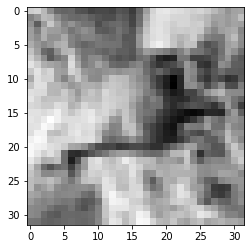

In [65]:
plt.imshow(dstack1[0, :, :], cmap='gray')
plt.show()

## f) Deep CNN

In [84]:
X_train = tf.convert_to_tensor(dstack1[:5000, :, :, :])
X_test = tf.convert_to_tensor(dstack1[5000:, :, :, :])
y_train = tf.convert_to_tensor(x2[:5000, :, :])
y_test = tf.convert_to_tensor(x2[5000:, :, :])

TensorShape([5000, 32, 32, 1])

In [104]:
def lossF(y_actual, y_pred):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(y_actual, y_pred)
    return tf.reduce_mean(loss)

In [119]:
# - 5x5 layers
# - softmax output layer
# - use min of one max pooling

# INPUT: dstack = 6000x32x32x1
# OUTPUT: x2 = 6000x4096x1
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

cnn = Sequential()
cnn.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 1)))
#cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
#cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
# MLP
cnn.add(layers.Dense(units=1000, input_dim = 1600, activation='relu'))
cnn.add(layers.Dense(units=4096, input_dim = 1000, activation='linear'))
cnn.summary()
# compile model
cnn.compile(optimizer='adam', loss=lossF) # loss='categorical_crossentropy'

history = cnn.fit(X_train, y_train, batch_size=100, epochs=30, verbose=1, validation_split = 0.1)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
flatten_37 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_72 (Dense)             (None, 1000)              36865000  
_________________________________________________________________
dense_73 (Dense)             (None, 4096)              4100096   
Total params: 41,017,192
Trainable params: 41,017,192
Non-trainable params: 0
_________________________________________________________________
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 19s 

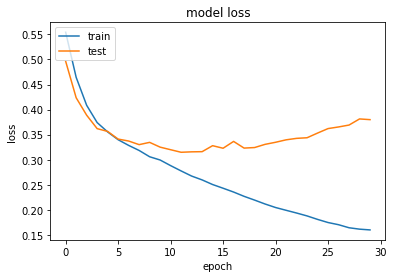

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
results = cnn.evaluate(X_test, y_test)
results1 = cnn.evaluate(X_train, y_train)
print("Test Error: " + str(results))
print("Train Error: " + str(results1))

5000/5000 [==============================] - 5s 919us/sample - loss: 0.1721
Test Error: 0.39327561473846434
Train Error: 0.17206266150474547


In [135]:
image0 = cnn.predict(tf.convert_to_tensor(dstack1))
image0 = image0.reshape(6000, 32, 32, 4)
image0

array([[[[-4.59913683e+00,  1.46160614e+00, -1.03287065e+00,
          -7.53100586e+00],
         [-7.39882565e+00,  1.44367301e+00, -6.19724572e-01,
          -6.72197151e+00],
         [-5.43977308e+00, -1.34437251e+00,  1.02616775e+00,
          -7.91190577e+00],
         ...,
         [-7.27824593e+00,  4.81239483e-02, -4.53911722e-01,
          -6.07722473e+00],
         [-6.42656326e+00,  1.57509625e+00, -9.79432642e-01,
          -6.53170776e+00],
         [-6.84362507e+00,  1.69719148e+00,  1.48066729e-01,
          -7.15155363e+00]],

        [[-6.05864286e+00, -9.64996397e-01,  1.34274626e+00,
          -7.15550280e+00],
         [-7.36246538e+00, -1.05948567e+00,  1.80341971e+00,
          -6.76447296e+00],
         [-7.63508320e+00, -8.07110488e-01,  1.03707206e+00,
          -7.16982651e+00],
         ...,
         [-5.26226425e+00,  3.97030324e-01,  5.14970541e-01,
          -1.23273325e+01],
         [-4.33530331e+00, -1.31219089e-01, -6.31356478e-01,
          -5.373000

## Comparison with Original (first 10)

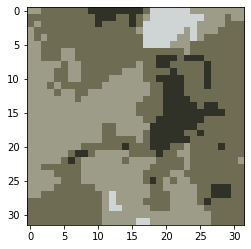

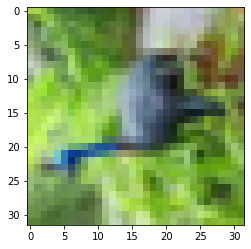

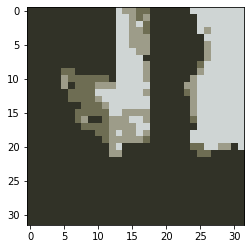

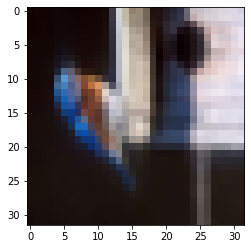

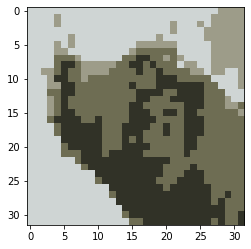

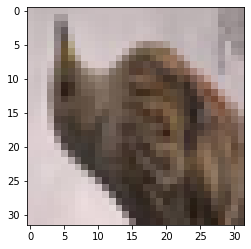

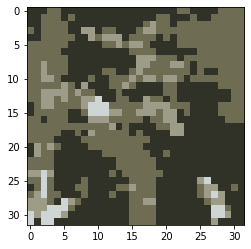

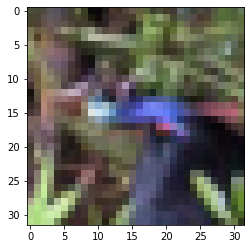

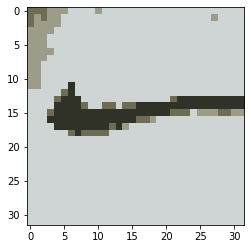

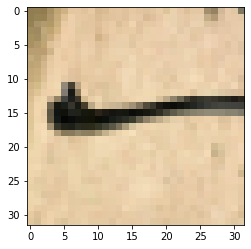

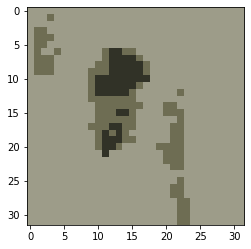

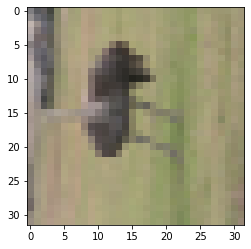

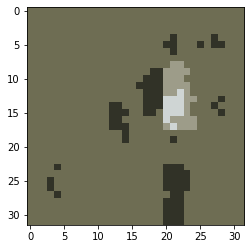

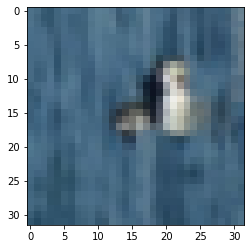

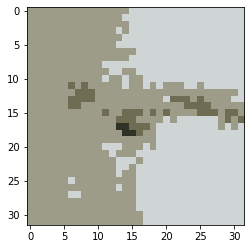

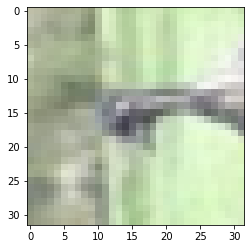

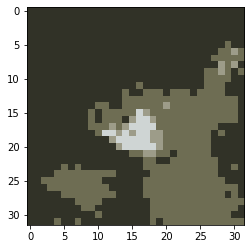

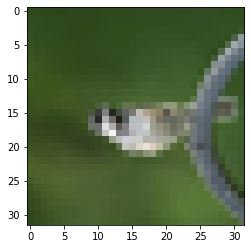

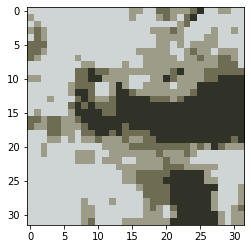

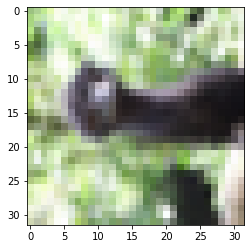

In [142]:
for k in range(10):
    ex = np.zeros(shape=(32, 32, 3))
    for i in range(32):
        for j in range(32):
            ex[i, j, :] = clusters[np.argmax(image0[k, i, j, :])]
    ex = np.uint8(ex)
    plt.imshow(ex)
    plt.show()

    plt.imshow(final[:, k, :].reshape(3, 32, 32).transpose())
    plt.show()

## EXTRA CREDIT PORTION

### K-means clustering

In [147]:
# k-means clustering (k=16)
# Flatten 6000 and 1024
final1 = final.reshape(3, 6144000).transpose()
kmeans = KMeans(n_clusters=16)
kmeans.fit(final1)
print(kmeans.cluster_centers_)

[[164.13923551 165.31488815 158.72589548]
 [ 75.66871956  74.56621461  52.23891493]
 [146.68031412 140.57625563  81.54167788]
 [ 19.66878756  20.33559988  16.3561035 ]
 [243.87975752 245.33969076 243.83623543]
 [113.47926874 155.88835525 202.27535165]
 [ 47.98316932  49.61919727  39.63323574]
 [167.633642   196.09685887 223.56856276]
 [117.20434625 116.33603394 102.53861371]
 [ 65.72741742 109.79679211 155.64755606]
 [200.15938201 190.8065752  166.82232677]
 [140.98754947 140.51762425 128.54449367]
 [216.20321309 215.28003287 209.07395515]
 [ 88.20733394  91.69848131  83.65412701]
 [183.06229949 166.95898093 111.59395855]
 [114.47078501 108.19684173  57.73892896]]


In [148]:
# Don't want to rerun k-means clustering again so just gonna initialize from result above
clusters = np.array([[164.13923551, 165.31488815, 158.72589548],
 [ 75.66871956,  74.56621461,  52.23891493],
 [146.68031412, 140.57625563,  81.54167788],
 [ 19.66878756,  20.33559988,  16.3561035 ],
 [243.87975752, 245.33969076, 243.83623543],
 [113.47926874, 155.88835525, 202.27535165],
 [ 47.98316932,  49.61919727,  39.63323574],
 [167.633642, 196.09685887, 223.56856276],
 [117.20434625, 116.33603394, 102.53861371],
 [ 65.72741742, 109.79679211, 155.64755606],
 [200.15938201, 190.8065752, 166.82232677],
 [140.98754947, 140.51762425, 128.54449367],
 [216.20321309, 215.28003287, 209.07395515],
 [ 88.20733394,  91.69848131,  83.65412701],
 [183.06229949, 166.95898093, 111.59395855],
 [114.47078501, 108.19684173,  57.73892896]])
clusters = np.around(clusters)
clusters

array([[164., 165., 159.],
       [ 76.,  75.,  52.],
       [147., 141.,  82.],
       [ 20.,  20.,  16.],
       [244., 245., 244.],
       [113., 156., 202.],
       [ 48.,  50.,  40.],
       [168., 196., 224.],
       [117., 116., 103.],
       [ 66., 110., 156.],
       [200., 191., 167.],
       [141., 141., 129.],
       [216., 215., 209.],
       [ 88.,  92.,  84.],
       [183., 167., 112.],
       [114., 108.,  58.]])

### Converting to 16-color images

In [ ]:
# Convert to colored images to the closest colour from those centroids
output = np.zeros(shape=(3, 6000, 1024))

for i in range(6000):
    for j in range(1024):
        distances = []
        for c in range(4):
            distances.append(np.linalg.norm(clusters[c]-final[:, i, j]))
        output[:, i, j] = clusters[np.argmin(distances)]

output

### One-hot encoding

In [149]:
# One-hot encoding output
output2 = np.zeros(shape=(6000,1024))
for i in range(6000):
    for j in range(1024):
        distances = []
        for c in range(16):
            distances.append(np.linalg.norm(clusters[c]-final[:, i, j]))
        output2[i, j] = np.argmin(distances)

In [161]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x = oh.fit_transform(output2.reshape(6144000, 1)).toarray()
x = x.reshape(6000, 1024, 16)

x1 = x[0, :, :].reshape(32, 32, 16).transpose(1, 0, 2).reshape(16384)
for i in range(1,6000):
    x1 = np.dstack((x1, x[i, :, :].reshape(32, 32, 16).transpose(1, 0, 2).reshape(16384)))
x2 = x1.transpose()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Deep cNN

In [162]:
X_train = tf.convert_to_tensor(dstack1[:5000, :, :, :])
X_test = tf.convert_to_tensor(dstack1[5000:, :, :, :])
y_train = tf.convert_to_tensor(x2[:5000, :, :])
y_test = tf.convert_to_tensor(x2[5000:, :, :])

In [164]:
# - 5x5 layers
# - softmax output layer
# - use min of one max pooling

# INPUT: dstack = 6000x32x32x1
# OUTPUT: x = 6000x16384x1
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

cnn = Sequential()
cnn.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 1)))
#cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
#cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
# MLP
cnn.add(layers.Dense(units=1000, input_dim = 36864, activation='relu'))
cnn.add(layers.Dense(units=16384, input_dim = 1000, activation='linear'))
cnn.summary()
# compile model
cnn.compile(optimizer='adam', loss=lossF) # loss='categorical_crossentropy'

history = cnn.fit(X_train, y_train, batch_size=300, epochs=15, verbose=1, validation_split = 0.1)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
flatten_40 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 1000)              36865000  
_________________________________________________________________
dense_79 (Dense)             (None, 16384)             16400384  
Total params: 53,317,480
Trainable params: 53,317,480
Non-trainable params: 0
_________________________________________________________________
Train on 4500 samples, validate on 500 samples
Epoch 1/15
4500/4500 [==============================] - 18s 

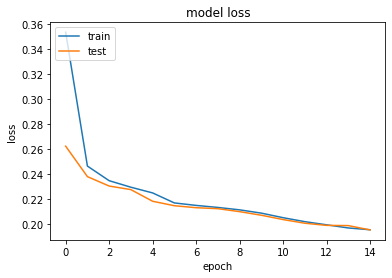

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [166]:
results = cnn.evaluate(X_test, y_test)
results1 = cnn.evaluate(X_train, y_train)
print("Test Error: " + str(results))
print("Train Error: " + str(results1))

5000/5000 [==============================] - 6s 1ms/sample - loss: 0.1932
Test Error: 0.1961663364171982
Train Error: 0.193228431224823


In [167]:
image0 = cnn.predict(tf.convert_to_tensor(dstack1))
image0 = image0.reshape(6000, 32, 32, 16)

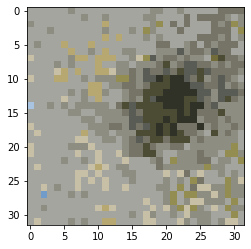

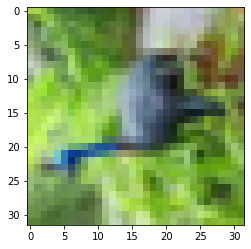

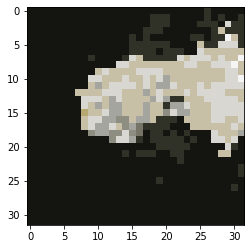

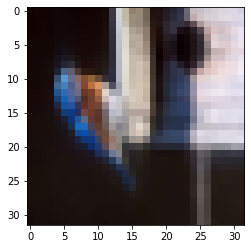

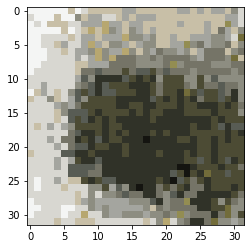

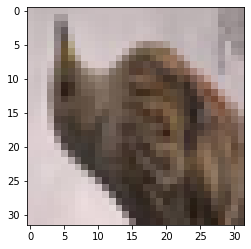

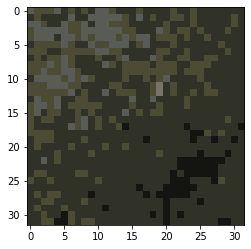

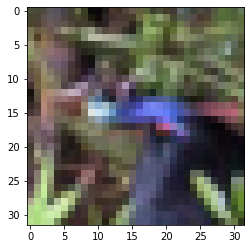

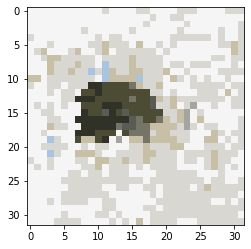

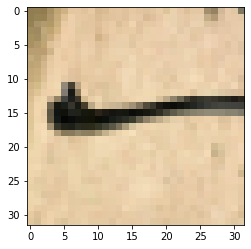

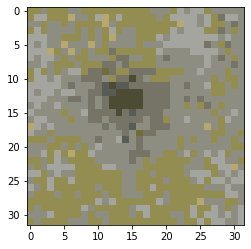

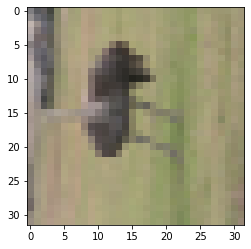

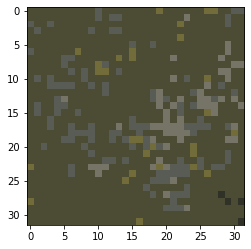

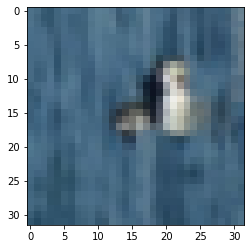

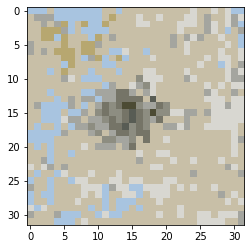

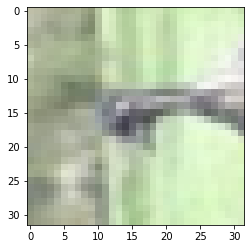

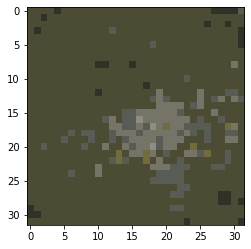

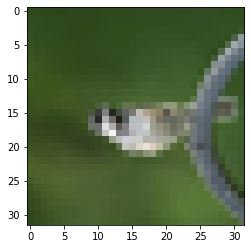

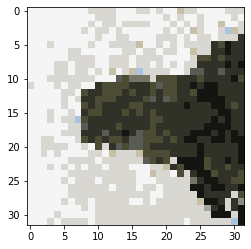

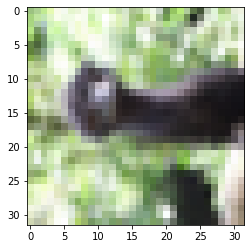

In [168]:
for k in range(10):
    ex = np.zeros(shape=(32, 32, 3))
    for i in range(32):
        for j in range(32):
            ex[i, j, :] = clusters[np.argmax(image0[k, i, j, :])]
    ex = np.uint8(ex)
    plt.imshow(ex)
    plt.show()

    plt.imshow(final[:, k, :].reshape(3, 32, 32).transpose())
    plt.show()